In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
file_path = '/content/Refined_UV_Exposure_Dataset.csv'
data = pd.read_csv(file_path)

In [25]:
data.head()

,Species,Organism,UV,"Exposure intensity (in J, KJ, W, KW)",Exposure time (in seconds),Exposure severity,Biological responses,Organelle,Metabolites names,Proteins names,Genes names,Studied tissue,Reference
0,0,1,0,2.92,232,hermetic,signaling,2,6,2,6,0,Scopus
1,0,2,1,78.31,2166,hermetic,epigenetic,4,4,6,1,2,Scopus
2,1,3,0,59.17,236,harmful,DNA repair,8,4,0,5,2,Scopus
3,2,0,0,18.04,111,hermetic,signaling,7,4,6,3,3,PMC ID
4,3,3,1,17.33,2275,harmful,DNA repair,8,2,1,2,5,Scopus


In [28]:
data.shape

(568, 13)

In [5]:
data['Exposure intensity (in J, KJ, W, KW)'] = data['Exposure intensity (in J, KJ, W, KW)'].str.replace('KJ', '')
data['Exposure intensity (in J, KJ, W, KW)'] = data['Exposure intensity (in J, KJ, W, KW)'].str.replace('J', '')
data['Exposure intensity (in J, KJ, W, KW)'] = data['Exposure intensity (in J, KJ, W, KW)'].str.replace('W', '')
data['Exposure intensity (in J, KJ, W, KW)'] = data['Exposure intensity (in J, KJ, W, KW)'].str.replace('KW', '')

In [6]:
# Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in ['Species', 'Organism', 'UV', 'Organelle', 'Metabolites names', 'Proteins names', 'Genes names', 'Studied tissue']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [7]:
# Step 3: Preprocess the dataset
# Normalize exposure intensity
def normalize_intensity(value):
    if isinstance(value, str):  # Check if the value is a string before applying string operations
        value = value.strip() # Remove any leading/trailing whitespace
        if 'J' in value:
            return float(value.replace('J', ''))
        elif 'KJ' in value:
            return float(value.replace('KJ', '')) * 1000
        elif 'W' in value:
            return float(value.replace('W', '')) * 3600  # Convert to J
        elif 'KW' in value:
            return float(value.replace('KW', '')) * 3600000  # Convert to J
        else:
            # Handle cases with unexpected characters, considering decimal points
            return float(value.replace('K', '').replace(' ','')) # Remove 'K' and any potential spaces **This line was causing the issue**
    else:
        return value  # Return the original value if it's not a string

# Apply the function to the column and check for any remaining non-numeric values
data['Exposure intensity (in J, KJ, W, KW)'] = data['Exposure intensity (in J, KJ, W, KW)'].apply(normalize_intensity)

# Check if there are still any non-numeric values
non_numeric = data['Exposure intensity (in J, KJ, W, KW)'][~data['Exposure intensity (in J, KJ, W, KW)'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric) # This will print any rows where conversion failed

# If the above print statement shows results, you'll need to further investigate and adjust the 'normalize_intensity' function to handle those specific cases.

Series([], Name: Exposure intensity (in J, KJ, W, KW), dtype: float64)


In [8]:
# Split the dataset into features and targets
X = data.drop(['Exposure severity', 'Biological responses', 'Reference'], axis=1)
y_severity = data['Exposure severity']
y_responses = data['Biological responses']


In [9]:
# Encode the target variables
severity_encoder = LabelEncoder()
y_severity_encoded = severity_encoder.fit_transform(y_severity)

responses_encoder = LabelEncoder()
y_responses_encoded = responses_encoder.fit_transform(y_responses)


In [10]:
X.shape

(568, 10)

In [11]:
# One-hot encode the targets
y_severity_encoded = to_categorical(y_severity_encoded)
y_responses_encoded = to_categorical(y_responses_encoded)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_severity_train, y_severity_test, y_responses_train, y_responses_test = train_test_split(
    X_scaled, y_severity_encoded, y_responses_encoded, test_size=0.2, random_state=42)


In [26]:
X_train.shape

(454, 10)

In [14]:
# Build the ANN model for Exposure severity
model_severity = Sequential()
model_severity.add(Dense(64, input_shape=[10], activation='relu'))
model_severity.add(Dense(32, activation='relu'))
model_severity.add(Dense(y_severity_encoded.shape[1], activation='softmax'))


In [15]:
# Compile the model
model_severity.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model
history_severity = model_severity.fit(X_train, y_severity_train, epochs=107, batch_size=10, validation_data=(X_test, y_severity_test))


Epoch 1/107
46/46 [==============================] - 1s 8ms/step - loss: 0.7168 - accuracy: 0.4692 - val_loss: 0.6997 - val_accuracy: 0.5175
Epoch 2/107
46/46 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5705 - val_loss: 0.7145 - val_accuracy: 0.5088
Epoch 3/107
46/46 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6079 - val_loss: 0.7171 - val_accuracy: 0.5351
Epoch 4/107
46/46 [==============================] - 0s 4ms/step - loss: 0.6443 - accuracy: 0.6564 - val_loss: 0.7249 - val_accuracy: 0.5000
Epoch 5/107
46/46 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.6586 - val_loss: 0.7320 - val_accuracy: 0.5175
Epoch 6/107
46/46 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.6916 - val_loss: 0.7395 - val_accuracy: 0.4825
Epoch 7/107
46/46 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.6850 - val_loss: 0.7425 - val_accuracy: 0.5000
Epoch 8/107
4

In [17]:
# Build the ANN model for Biological responses
model_responses = Sequential()
model_responses.add(Dense(64, input_shape=[10], activation='relu'))
model_responses.add(Dense(32, activation='relu'))
model_responses.add(Dense(y_responses_encoded.shape[1], activation='softmax'))


In [18]:
# Compile the model
model_responses.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
history_responses = model_responses.fit(X_train, y_responses_train, epochs=117, batch_size=10, validation_data=(X_test, y_responses_test))


Epoch 1/117
46/46 [==============================] - 1s 13ms/step - loss: 1.6324 - accuracy: 0.2357 - val_loss: 1.6426 - val_accuracy: 0.2281
Epoch 2/117
46/46 [==============================] - 0s 5ms/step - loss: 1.5845 - accuracy: 0.2665 - val_loss: 1.6456 - val_accuracy: 0.2193
Epoch 3/117
46/46 [==============================] - 0s 4ms/step - loss: 1.5610 - accuracy: 0.2907 - val_loss: 1.6524 - val_accuracy: 0.2193
Epoch 4/117
46/46 [==============================] - 0s 5ms/step - loss: 1.5393 - accuracy: 0.3040 - val_loss: 1.6606 - val_accuracy: 0.2105
Epoch 5/117
46/46 [==============================] - 0s 6ms/step - loss: 1.5212 - accuracy: 0.3348 - val_loss: 1.6732 - val_accuracy: 0.2105
Epoch 6/117
46/46 [==============================] - 0s 5ms/step - loss: 1.5069 - accuracy: 0.3458 - val_loss: 1.6775 - val_accuracy: 0.2193
Epoch 7/117
46/46 [==============================] - 0s 4ms/step - loss: 1.4864 - accuracy: 0.3700 - val_loss: 1.6863 - val_accuracy: 0.2105
Epoch 8/117


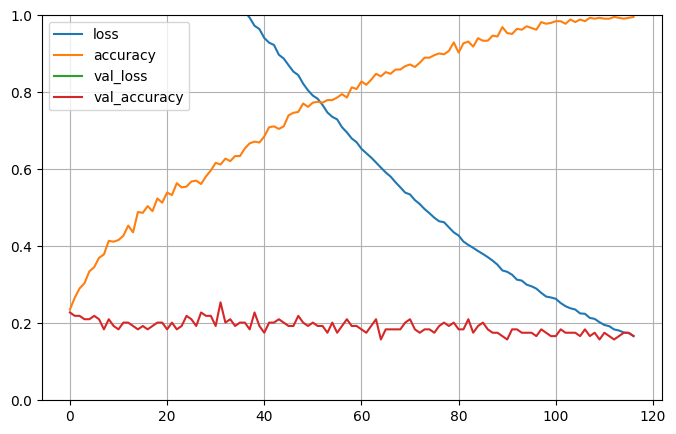

In [21]:
pd.DataFrame(history_responses.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
val_accuracies = history_responses.history['accuracy']

# Find the epoch with the highest accuracy
max_val_acc_epoch = np.argmax(val_accuracies) + 1  # +1 to convert from zero-indexed to one-indexed
max_val_acc = val_accuracies[max_val_acc_epoch - 1]

print(f"Epoch with highest accuracy: {max_val_acc_epoch}")
print(f"Highest accuracy: {max_val_acc}")

Epoch with highest accuracy: 113
Highest accuracy: 0.9955947399139404


In [23]:
import joblib
responses_file = "responses.pkl"
joblib.dump(model_responses, responses_file)

severity_file = "severity.pkl"
joblib.dump(model_severity, severity_file)

['severity.pkl']

In [24]:
# from google.colab import files
# files.download(severity_file)
# files.download(responses_file)

In [32]:
data = data.rename(columns={
    'Species': 'species',
    'Organism': 'organism',
    'UV': 'uv_type',
    'Organelle': 'organelle',
    'Metabolites names': 'metabolites',
    'Proteins names': 'proteins',
    'Genes names': 'genes',
    'Studied tissue': 'studied_tissue',
    'Exposure intensity (in J, KJ, W, KW)': 'exposure_intensity',
    'Exposure severity': 'exposure_severity',
    'Biological responses': 'biological_responses',
    'Reference': 'reference',
    'Exposure time (in seconds)': 'exposure_time'
})

In [33]:
data.head()

,species,organism,uv_type,exposure_intensity,exposure_time,exposure_severity,biological_responses,organelle,metabolites,proteins,genes,studied_tissue,reference
0,0,1,0,2.92,232,hermetic,signaling,2,6,2,6,0,Scopus
1,0,2,1,78.31,2166,hermetic,epigenetic,4,4,6,1,2,Scopus
2,1,3,0,59.17,236,harmful,DNA repair,8,4,0,5,2,Scopus
3,2,0,0,18.04,111,hermetic,signaling,7,4,6,3,3,PMC ID
4,3,3,1,17.33,2275,harmful,DNA repair,8,2,1,2,5,Scopus
